<a href="https://colab.research.google.com/github/AdakMahato/ML/blob/main/ML_ASG_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Gaussian Naïve Bayes Classifier) Implement Gaussian Naïve Bayes Classifier on the Iris dataset from sklearn.datasets using
        (i) Step-by-step implementation    
        (ii) In-built function

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_stats = {}
for label in np.unique(y_train):
    class_stats[label] = {
        'mean': X_train[y_train == label].mean(axis=0),
        'var': X_train[y_train == label].var(axis=0),
        'prior': (y_train == label).mean()
    }

def gaussian_pdf(x, mean, var):
    return (1.0 / np.sqrt(2 * np.pi * var)) * np.exp(-(x - mean) ** 2 / (2 * var))

def predict(X):
    predictions = []
    for sample in X:
        posteriors = []
        for label, stats in class_stats.items():
            prior = np.log(stats['prior'])
            conditional = np.sum(np.log(gaussian_pdf(sample, stats['mean'], stats['var'])))
            posterior = prior + conditional
            posteriors.append(posterior)
        predictions.append(np.argmax(posteriors))
    return predictions

y_pred = predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (step-by-step): {accuracy:.2f}')


Accuracy (step-by-step): 1.00


In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (in-built): {accuracy:.2f}')


Accuracy (in-built): 1.00


Explore about GridSearchCV toot in scikit-learn. This is a tool that is often used for tuning hyperparameters of machine learning models. Use this tool to find the best value of K for K-NN Classifier using any dataset.


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 31)}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f'Best value of K: {best_k}')

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best K: {accuracy:.2f}')


Best value of K: 3
Accuracy with best K: 1.00


In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
param_grid = {'n_neighbors': range(1, 10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameter (k):", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
knn = grid_search.best_estimator_
print("Test set score:", knn.score(X_test, y_test))

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best parameter (k): {'n_neighbors': 6}
Best cross-validation score: 0.9436935704514365
Test set score: 0.916083916083916
Accuracy: 0.916083916083916


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


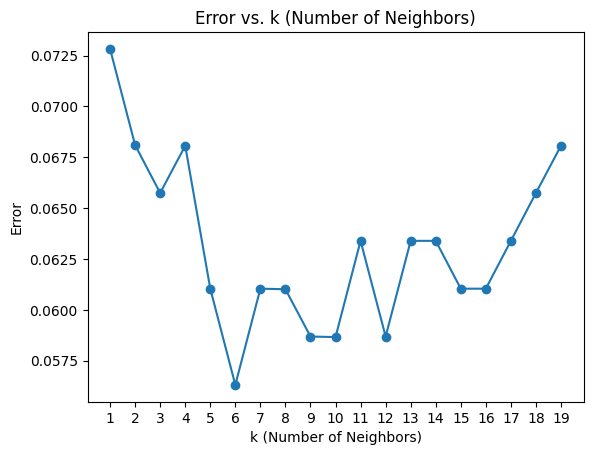

Best parameter (k): {'n_neighbors': 6}
Best cross-validation score: 0.9436935704514365
Test set score with best k: 0.916083916083916
Accuracy: 0.916083916083916


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

param_grid = {'n_neighbors': range(1, 20)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

mean_test_scores = results['mean_test_score']
k_values = range(1, 20)

plt.figure()
plt.plot(k_values, 1 - mean_test_scores, marker='o')  # Plot error (1 - accuracy)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error')
plt.title('Error vs. k (Number of Neighbors)')
plt.xticks(k_values)
plt.show()

print("Best parameter (k):", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

knn = grid_search.best_estimator_
test_score = knn.score(X_test, y_test)
print("Test set score with best k:", test_score)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

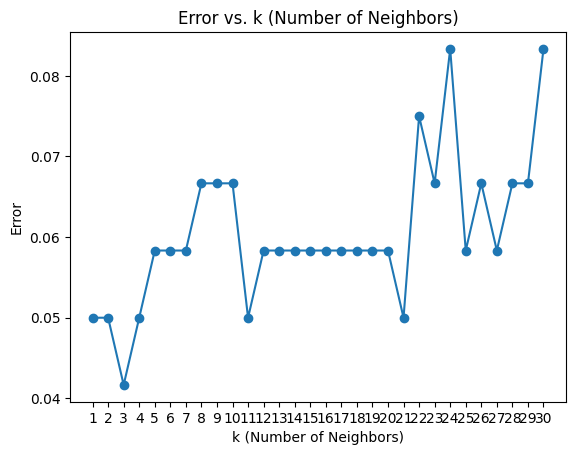

Best value of K: 3
Accuracy with best K: 1.00


In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': range(1, 31)}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

mean_test_scores = results['mean_test_score']
k_values = range(1, 31)

plt.figure()
plt.plot(k_values, 1 - mean_test_scores, marker='o')  # Plot error (1 - accuracy)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error')
plt.title('Error vs. k (Number of Neighbors)')
plt.xticks(k_values)
plt.show()
best_k = grid_search.best_params_['n_neighbors']
print(f'Best value of K: {best_k}')

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best K: {accuracy:.2f}')
